# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from pprint import pprint 
from scipy.stats import linregress
from matplotlib import cm


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"{len(cities)} cities total")


586 cities total


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
selected_attributes = ['chosen_city(cities[n])', 'lat(cities[n])', 'lon(cities[n])', 'max_temp(cities[n])','humidity(cities[n])','cloudiness(cities[n])','windspeed(cities[n])','country(cities[n])','date(cities[n])']
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_for_city_json = pd.DataFrame([]).to_json()
selected_weather_data_dictionary = dict()
weather_for_cities_df = pd.DataFrame([])

# openweather dictionary terms
def chosen_city(city):
    city_name = weather_for_city_json['name'] 
    selected_weather_data_dictionary['City'] = city_name
def lat(city):
    city_lat = weather_for_city_json['coord']['lat']
    selected_weather_data_dictionary['Lat.'] = city_lat
def lon(city):
    city_lon = weather_for_city_json['coord']['lon']
    selected_weather_data_dictionary['Lon.'] = city_lon
def max_temp(city):
    city_max_temp = weather_for_city_json['main']['temp_max']
    selected_weather_data_dictionary['Max. Temp.'] = city_max_temp
def humidity(city):
    city_humidity = weather_for_city_json['main']['humidity']
    selected_weather_data_dictionary['Humidity'] = city_humidity
def cloudiness(city):
    city_cloudiness = weather_for_city_json['clouds']['all']
    selected_weather_data_dictionary['Cloudiness'] = city_cloudiness  
def windspeed(city):
    city_windspeed = weather_for_city_json['wind']['speed']
    selected_weather_data_dictionary['Windspeed'] = city_windspeed
def country(city):
    city_country = weather_for_city_json['sys']['country']
    selected_weather_data_dictionary['Country'] = city_country
def date(city):
    city_data_date = weather_for_city_json['dt']
    selected_weather_data_dictionary['Date'] = city_data_date

# assemble dataframe for selected data by city
for n in range(len(cities)):
    try:
        query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + cities[n]
        weather_for_city_response = requests.get(query_url)
        weather_for_city_json = weather_for_city_response.json()
        for attribute in selected_attributes:
            eval(attribute)
        weather_for_cities_df = weather_for_cities_df.append(pd.DataFrame([selected_weather_data_dictionary.values()], columns=selected_weather_data_dictionary.keys(),index=[n]))
    except KeyError:
        city = cities[n]
        print(f"city named: '{city}' was not found")

city named: 'tsihombe' was not found
city named: 'illoqqortoormiut' was not found
city named: 'amderma' was not found
city named: 'vaitupu' was not found
city named: 'saleaula' was not found
city named: 'jiddah' was not found
city named: 'tumannyy' was not found
city named: 'julana' was not found
city named: 'ijaki' was not found
city named: 'kamenskoye' was not found
city named: 'boljarovo' was not found
city named: 'meyungs' was not found
city named: 'dekoa' was not found
city named: 'taolanaro' was not found
city named: 'sentyabrskiy' was not found
city named: 'umzimvubu' was not found
city named: 'samalaeulu' was not found
city named: 'belushya guba' was not found
city named: 'hihifo' was not found
city named: 'azimur' was not found
city named: 'uwayl' was not found
city named: 'sorvag' was not found
city named: 'tidore' was not found
city named: 'louisbourg' was not found
city named: 'attawapiskat' was not found
city named: 'ksenyevka' was not found
city named: 'grand river south 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_for_cities_df.to_csv('../output_data/weather_for_cities.csv')
weather_for_cities_df

In [6]:
weather_for_cities_df.describe()

,Lat.,Lon.,Max. Temp.,Humidity,Cloudiness,Windspeed,Date
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02
mean,17.852032,17.680660,62.054034,66.454545,56.272727,8.101080,1.618679e+09
std,33.107351,90.483134,21.752930,22.675707,37.395286,5.341729,8.812341e+01
min,-54.800000,-179.166700,-21.100000,3.000000,0.000000,0.400000,1.618678e+09
25%,-10.020300,-60.858525,50.000000,53.000000,20.000000,4.327500,1.618679e+09
50%,19.317250,22.294700,66.335000,71.000000,70.500000,6.910000,1.618679e+09
75%,45.550875,99.168250,78.850000,84.000000,90.000000,10.550000,1.618679e+09
max,78.218600,179.316700,103.410000,100.000000,100.000000,36.240000,1.618679e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_cities_df = pd.DataFrame([])
high_humidity_drop_list = []
try:
    high_humidity_cities_df = weather_for_cities_df.loc[weather_for_cities_df['Humidity']>100]
    high_humidity_drop_list = high_humidity_cities_df.index()
except Exception:
    pass

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.  
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_for_cities_df.drop(index=high_humidity_drop_list, inplace=False, errors='ignore')
clean_city_data_df

,City,Lat.,Lon.,Max. Temp.,Humidity,Cloudiness,Windspeed,Country,Date
0,East London,-33.0153,27.9116,66.20,72,0,11.50,ZA,1618678922
1,Albany,42.6001,-73.9662,50.00,56,98,6.44,US,1618678757
2,Yanam,16.7333,82.2167,86.00,66,0,6.91,IN,1618678922
3,Bredasdorp,-34.5322,20.0403,64.40,77,24,5.75,ZA,1618678923
4,Ponta do Sol,32.6667,-17.1000,68.00,53,83,5.99,PT,1618678923
...,...,...,...,...,...,...,...,...,...
579,Praia,14.9215,-23.5087,75.20,64,20,21.85,CV,1618679099
580,San Ramon,37.7799,-121.9780,64.00,71,40,2.42,US,1618679099
581,Banda Aceh,5.5577,95.3222,80.19,78,51,5.61,ID,1618678867
583,Pemba,-12.9740,40.5178,80.60,78,40,18.41,MZ,1618679100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

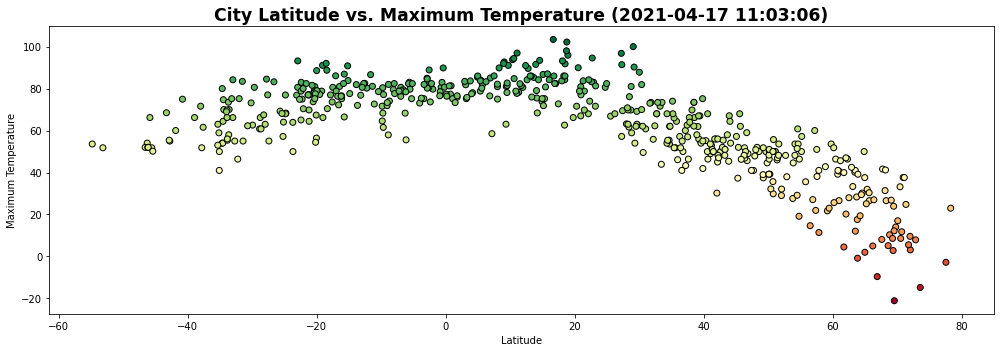

In [23]:
# set timestamp for when API calls were made 
timestamp = datetime.datetime.fromtimestamp(int(round(clean_city_data_df['Date'].mean(),0)))
date_mean = timestamp.strftime('%Y-%m-%d %H:%M:%S')

# plot size
fig, ax = plt.subplots(figsize=(14, 5))
# plot x_axis
x_scatter_lat = clean_city_data_df['Lat.']
# plot y_axis
y_scatter_max_temp = clean_city_data_df['Max. Temp.']
# plot define colormap
c = y_scatter_max_temp
# generate plot and plot labels
plt.scatter(x_scatter_lat, y_scatter_max_temp, edgecolors = 'black', c=c, cmap='RdYlGn')
plt.title(f"City Latitude vs. Maximum Temperature ({date_mean})", size ='xx-large', weight="bold")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.tight_layout()
# save the figure
plt.savefig('../output_data/City Latitude vs. Maximum Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

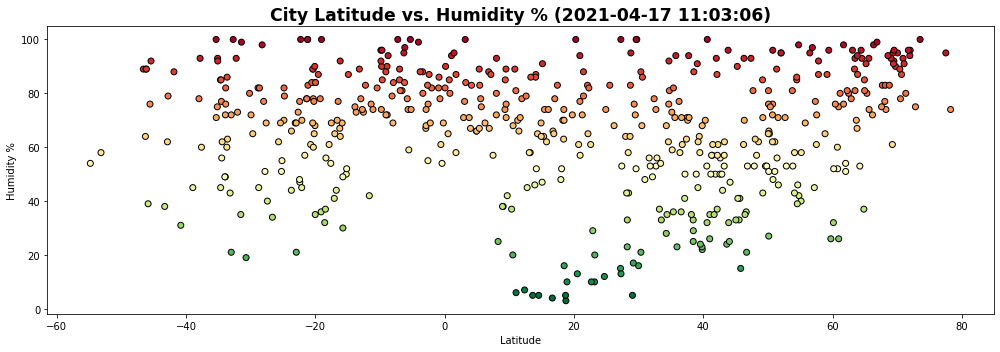

In [24]:
# plot size
fig, ax = plt.subplots(figsize=(14, 5))
# plot y_axis
y_scatter_humidity = clean_city_data_df['Humidity']
# plot colormap
c = y_scatter_humidity
# generate plot and plot labels
plt.scatter(x_scatter_lat, y_scatter_humidity, edgecolors = 'black', c=-c, cmap='RdYlGn')
plt.title(f"City Latitude vs. Humidity % ({date_mean})", size ='xx-large', weight="bold")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.tight_layout()
# save the figure
plt.savefig('../output_data/City Latitude vs. Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

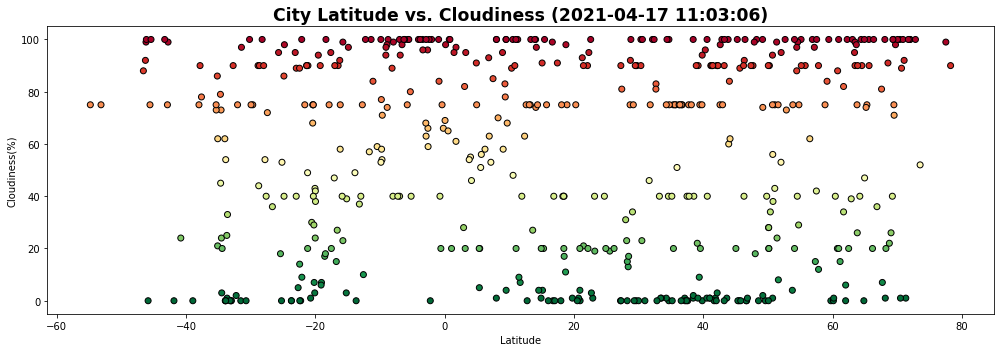

In [25]:
# plot size
fig, ax = plt.subplots(figsize=(14, 5))
# plot y_axis
y_scatter_cloudiness = clean_city_data_df['Cloudiness']
# plot colormap
c = y_scatter_cloudiness
# generate plot and plot labels
plt.scatter(x_scatter_lat, y_scatter_cloudiness, edgecolors = 'black', c=-c, cmap='RdYlGn')
plt.title(f"City Latitude vs. Cloudiness ({date_mean})", size ='xx-large', weight="bold")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.tight_layout()
# save the figure
plt.savefig('../output_data/City Latitude vs. Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

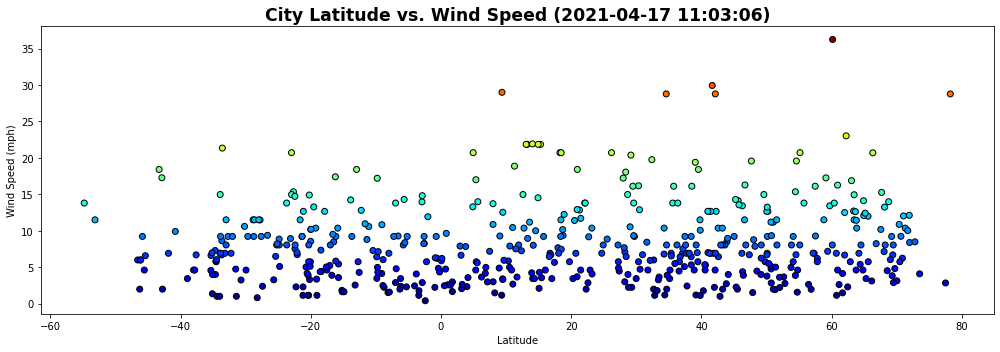

In [26]:
# plot size
fig, ax = plt.subplots(figsize=(14, 5))
# plot y_axis
y_scatter_windspeed = clean_city_data_df['Windspeed']
# plot colormap
c = y_scatter_windspeed
# generate plot and plot labels
plt.scatter(x_scatter_lat, y_scatter_windspeed, edgecolors = 'black', c=c,cmap='jet')
plt.title(f"City Latitude vs. Wind Speed ({date_mean})", size ='xx-large', weight="bold")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
# save the figure
plt.savefig('../output_data/City Latitude vs. Wind Speed.png')
plt.show()

## Linear Regression

In [13]:
# Calculate the correlation coefficient and linear regression model 
def n_axis(x, y):
    scatter_x = x
    scatter_y = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_x, scatter_y)
    regress_values = scatter_x * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    return((scatter_x), (scatter_y), (regress_values), f"the equation for the line of best fit is: {line_eq}", f"the r-squared value is: {rvalue**2}", slope)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

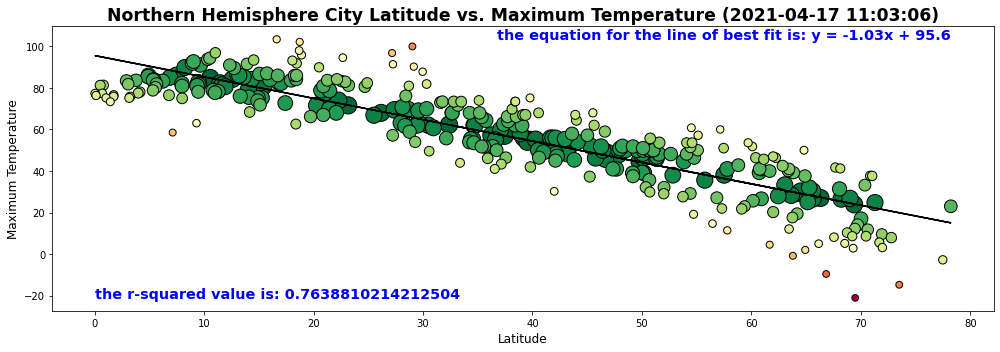

In [14]:
northern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']>=0]
x = northern_hemisphere_clean_city_data_df['Lat.']
y = northern_hemisphere_clean_city_data_df['Max. Temp.']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_northern_hemisphere_clean_city_data_df = northern_hemisphere_clean_city_data_df
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.copy()
sorted_northern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_northern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_northern_hemisphere_clean_city_data_df['Lat.']
y = sorted_northern_hemisphere_clean_city_data_df['Max. Temp.']
abs_diff_list = list(sorted_northern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Maximum Temperature', size='large')
plt.title(f"Northern Hemisphere City Latitude vs. Maximum Temperature ({date_mean})", size ='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=c, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Northern Hemisphere City Latitude vs. Maximum Temperature.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

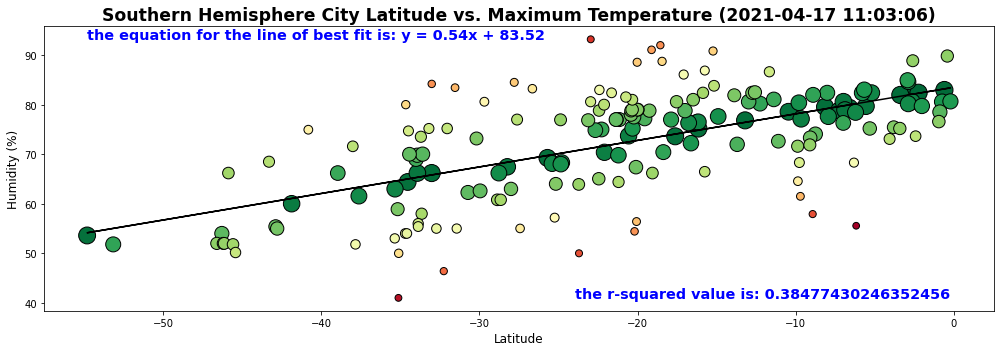

In [15]:
southern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']<=0]
x = southern_hemisphere_clean_city_data_df['Lat.']
y = southern_hemisphere_clean_city_data_df['Max. Temp.']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_southern_hemisphere_clean_city_data_df = southern_hemisphere_clean_city_data_df
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.copy()
sorted_southern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_southern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_southern_hemisphere_clean_city_data_df['Lat.']
y = sorted_southern_hemisphere_clean_city_data_df['Max. Temp.']
abs_diff_list = list(sorted_southern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Maximum Temperature', size='large')
plt.title(f"Southern Hemisphere City Latitude vs. Maximum Temperature ({date_mean})", size ='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=c, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Southern Hemisphere City Latitude vs. Maximum Temperature.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

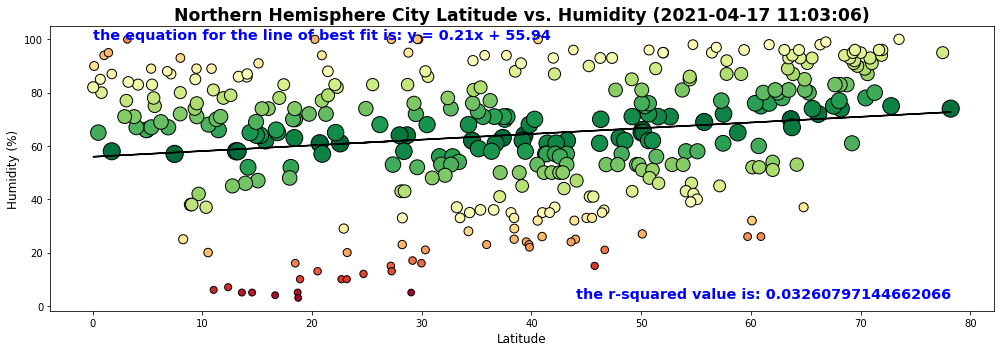

In [16]:
northern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']>=0]
x = northern_hemisphere_clean_city_data_df['Lat.']
y = northern_hemisphere_clean_city_data_df['Humidity']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_northern_hemisphere_clean_city_data_df = northern_hemisphere_clean_city_data_df
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.copy()
sorted_northern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_northern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_northern_hemisphere_clean_city_data_df['Lat.']
y = sorted_northern_hemisphere_clean_city_data_df['Humidity']
abs_diff_list = list(sorted_northern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Humidity (%)', size='large')
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({date_mean})", size ='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=c, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Northern Hemisphere City Latitude vs. Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

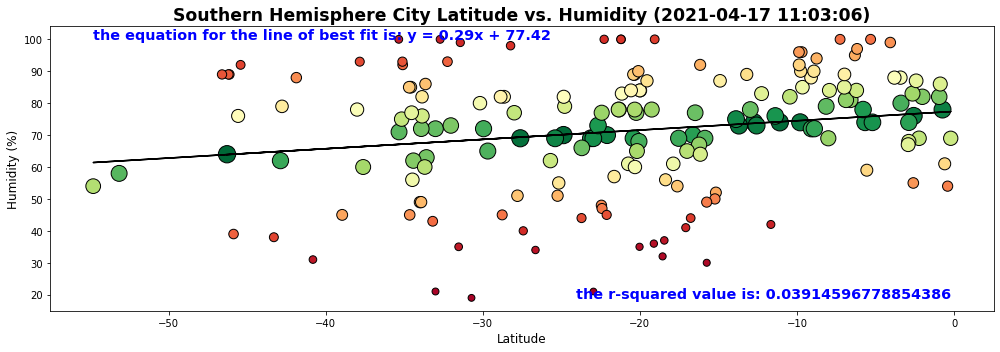

In [17]:
southern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']<=0]
x = southern_hemisphere_clean_city_data_df['Lat.']
y = southern_hemisphere_clean_city_data_df['Humidity']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_southern_hemisphere_clean_city_data_df = southern_hemisphere_clean_city_data_df
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.copy()
sorted_southern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_southern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_southern_hemisphere_clean_city_data_df['Lat.']
y = sorted_southern_hemisphere_clean_city_data_df['Humidity']
abs_diff_list = list(sorted_southern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Humidity (%)', size='large')
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({date_mean})", size ='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=s, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Southern Hemisphere City Latitude vs. Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
northern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']>=0]
x = northern_hemisphere_clean_city_data_df['Lat.']
y = northern_hemisphere_clean_city_data_df['Cloudiness']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_northern_hemisphere_clean_city_data_df = northern_hemisphere_clean_city_data_df
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.copy()
sorted_northern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_northern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_northern_hemisphere_clean_city_data_df['Lat.']
y = sorted_northern_hemisphere_clean_city_data_df['Cloudiness']
abs_diff_list = list(sorted_northern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size = 'large')
plt.ylabel('Cloudiness (%)', size = 'large')
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({date_mean})", size ='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=s, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Northern Hemisphere City Latitude vs. Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

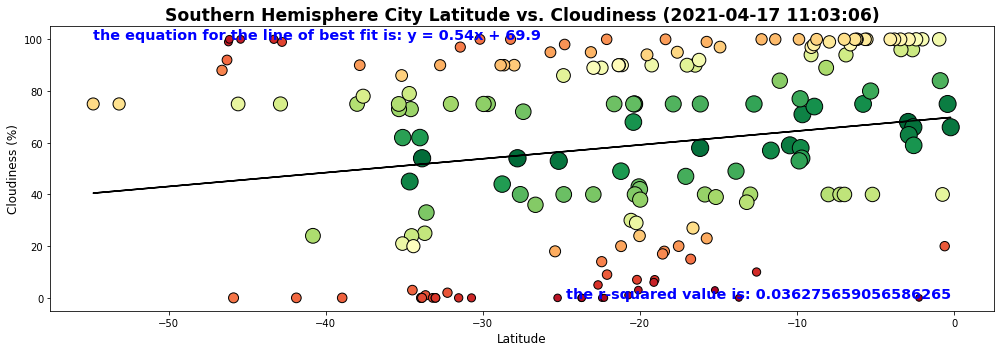

In [19]:
southern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']<=0]
x = southern_hemisphere_clean_city_data_df['Lat.']
y = southern_hemisphere_clean_city_data_df['Cloudiness']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_southern_hemisphere_clean_city_data_df = southern_hemisphere_clean_city_data_df
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.copy()
sorted_southern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_southern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_southern_hemisphere_clean_city_data_df['Lat.']
y = sorted_southern_hemisphere_clean_city_data_df['Cloudiness']
abs_diff_list = list(sorted_southern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Cloudiness (%)', size='large')
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({date_mean})", size='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=s, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold") 
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Southern Hemisphere City Latitude vs. Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

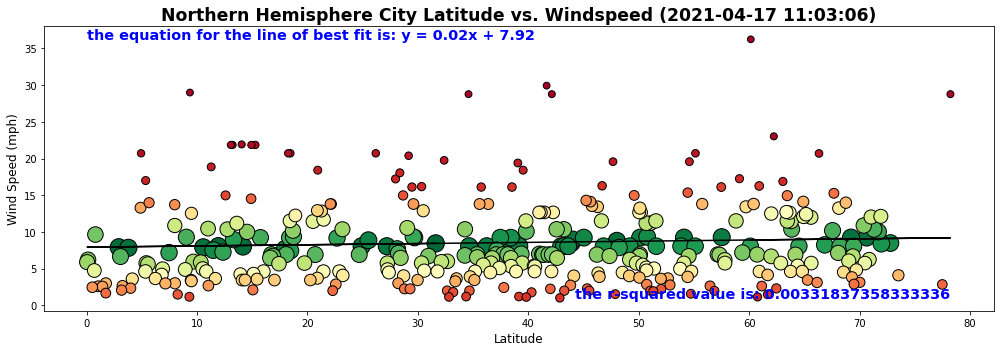

In [20]:
northern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']>=0]
x = northern_hemisphere_clean_city_data_df['Lat.']
y = northern_hemisphere_clean_city_data_df['Windspeed']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_northern_hemisphere_clean_city_data_df = northern_hemisphere_clean_city_data_df
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.copy()
sorted_northern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_northern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_northern_hemisphere_clean_city_data_df = sorted_northern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_northern_hemisphere_clean_city_data_df['Lat.']
y = sorted_northern_hemisphere_clean_city_data_df['Windspeed']
abs_diff_list = list(sorted_northern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Wind Speed (mph)', size='large')
plt.title(f"Northern Hemisphere City Latitude vs. Windspeed ({date_mean})", size='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=s, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold")    
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Northern Hemisphere City Latitude vs. Windspeed.png')
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

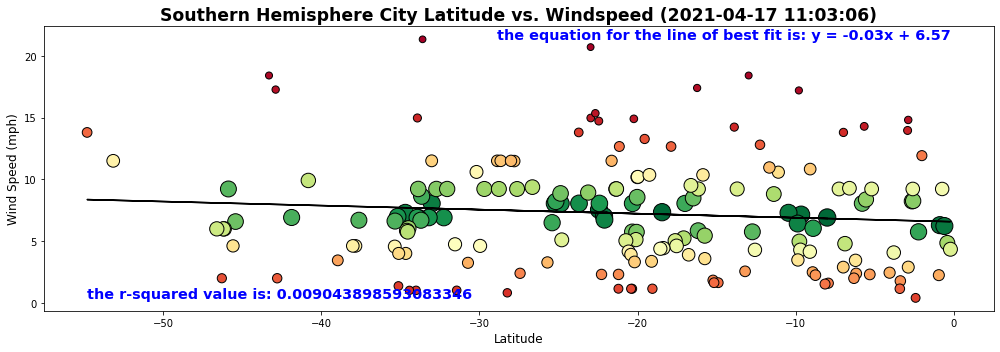

In [21]:
southern_hemisphere_clean_city_data_df = clean_city_data_df.loc[clean_city_data_df['Lat.']<=0]
x = southern_hemisphere_clean_city_data_df['Lat.']
y = southern_hemisphere_clean_city_data_df['Windspeed']
s_list = list(n_axis(x,y)[2])
y_list = list(y)
diff_list = [y_list[i]-s_list[i] for i in range(len(y_list))]
abs_diff_list = [abs(y_list[i]-s_list[i]) for i in range(len(y_list))]
sorted_southern_hemisphere_clean_city_data_df = southern_hemisphere_clean_city_data_df
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.copy()
sorted_southern_hemisphere_clean_city_data_df["diff_list"] = diff_list
sorted_southern_hemisphere_clean_city_data_df["abs_diff_list"] = abs_diff_list
sorted_southern_hemisphere_clean_city_data_df = sorted_southern_hemisphere_clean_city_data_df.sort_values("abs_diff_list")
x = sorted_southern_hemisphere_clean_city_data_df['Lat.']
y = sorted_southern_hemisphere_clean_city_data_df['Windspeed']
abs_diff_list = list(sorted_southern_hemisphere_clean_city_data_df['abs_diff_list'])
c = [-abs_diff_list[i] for i in range(len(y_list))]
s = np.linspace(300,45,len(y))
fig, ax = plt.subplots(figsize=(14, 5))
plt.xlabel('Latitude', size='large')
plt.ylabel('Wind Speed (mph)', size='large')
plt.title(f"Southern Hemisphere City Latitude vs. Windspeed ({date_mean})", size='xx-large', weight="bold")
plt.scatter(n_axis(x, y)[0], n_axis(x, y)[1], edgecolors='black', s=s, c=s, cmap='RdYlGn')
plt.plot(n_axis(x, y)[0],n_axis(x, y)[2],color='black')
if n_axis(x,y)[5] >= 0:
    plt.text(x.max(),y.min(), n_axis(x,y)[4], size='x-large', horizontalalignment='right', color='blue', weight="bold")
    plt.text(x.min(),y.max(),n_axis(x,y)[3], size='x-large', color='blue', weight="bold")
elif n_axis(x,y)[5] <= 0:
    plt.text(x.min(),y.min(), n_axis(x,y)[4], size='x-large', color='blue', weight="bold")
    plt.text(x.max(),y.max(), n_axis(x,y)[3], size='x-large', horizontalalignment='right', color='blue', weight="bold")  
plt.tight_layout()
# save the figure
plt.savefig('../output_data/Southern Hemisphere City Latitude vs. Windspeed.png')
plt.show()

In [ ]:
# WRITTEN DESCRIPTION OF THREE(FOUR) OBSERVABLE TRENDS
# 1. Plots of 'Max. Temp.' vs. 'Latitude' all fulfill, in general, seasonal expectations for temperature vs. latitude
#    1.1 Temperatures tend to be higher near the equator and lower for the hemisphere further away from the sun because of the tilt of Earth's axis.
#       1.1.1 Strong negative correlation between latitude and maximum temperature in the northern hemisphere and postive correlation between latitude and maximum temperature in the southern hemisphere.   
# 2. The average global windspeed of Earth at the time this data is pulled is represented approximately by the sum of the linear regression lines from latitude vs windspeed plots for the northern and southern hemispheres.
# 3. Cloudiness measurements are stratified (one data pull showed cloudiness strata clumped at 0%, ~20%, ~40%, ~75%, ~100%) and are skewed toward the extremes of 100% cloudiness and 0% cloudiness.
# 4. One data pull showed that most cities were located in areas that showed humidity of ~50% or higher (possibly a human preference). 